In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# # method 1
# df = pd.read_csv('../data/lyrics_02.csv')

# method 2
df = pd.read_json('../data/lyrics_02.json')

In [5]:
# df.head()

# df.tail()

# df.describe()

# df.info()

In [6]:
df = df.dropna()

In [7]:
df = df.drop(df[df['lyrics'] == ''].index)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9492 entries, 1 to 10099
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   week      9492 non-null   object
 1   standing  9492 non-null   int64 
 2   artist    9492 non-null   object
 3   title     9492 non-null   object
 4   lyrics    9492 non-null   object
dtypes: int64(1), object(4)
memory usage: 444.9+ KB


In [9]:
df.describe()

,standing
count,9492.000000
mean,50.130952
std,28.839165
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [10]:
df.head()

,week,standing,artist,title,lyrics
1,2020-05-02,2,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ..."
2,2020-05-02,3,Roddy Ricch,The Box,Pullin' out the coupe at the lot\r\nTold 'em f...
3,2020-05-02,4,Dua Lipa,Don't Start Now,"If you don't wanna see me\r\nDid a full 180, c..."
4,2020-05-02,5,Doja Cat,Say So,"Day and night til morning, keeping me in the m..."
5,2020-05-02,6,Post Malone,Circles,"Hey, hey, hey, hey\r\nOh, oh, oh-oh\r\nOh, oh,..."


In [11]:
# df.tail()

df.reset_index(inplace=True)

# df.tail()

df.drop(['index'], axis=1, inplace=True)

In [12]:
df.head()

,week,standing,artist,title,lyrics
0,2020-05-02,2,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ..."
1,2020-05-02,3,Roddy Ricch,The Box,Pullin' out the coupe at the lot\r\nTold 'em f...
2,2020-05-02,4,Dua Lipa,Don't Start Now,"If you don't wanna see me\r\nDid a full 180, c..."
3,2020-05-02,5,Doja Cat,Say So,"Day and night til morning, keeping me in the m..."
4,2020-05-02,6,Post Malone,Circles,"Hey, hey, hey, hey\r\nOh, oh, oh-oh\r\nOh, oh,..."


In [13]:
r_list = []
for row in df['lyrics']:
    r_list.append('\r' in row)

df[r_list]

,week,standing,artist,title,lyrics
0,2020-05-02,2,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ..."
1,2020-05-02,3,Roddy Ricch,The Box,Pullin' out the coupe at the lot\r\nTold 'em f...
2,2020-05-02,4,Dua Lipa,Don't Start Now,"If you don't wanna see me\r\nDid a full 180, c..."
3,2020-05-02,5,Doja Cat,Say So,"Day and night til morning, keeping me in the m..."
4,2020-05-02,6,Post Malone,Circles,"Hey, hey, hey, hey\r\nOh, oh, oh-oh\r\nOh, oh,..."
...,...,...,...,...,...
9484,1995-06-03,92,Bonnie Raitt,"You Got It (From ""Boys On The Side"")",[Boys On The Side soundtrack]\r\nEvery time I ...
9487,1995-06-03,96,Sophie B. Hawkins,As I Lay Me Down,It felt like spring time on this February morn...
9489,1995-06-03,98,Ty Herndon,What Mattered Most,I thought I knew the girl so well\r\nIf she wa...
9490,1995-06-03,99,Madonna,Bedtime Story,Today\r\nIs the last day \nThat I'm using word...


In [14]:
def remove_specials_in_column(df, col_num):
    for idx, entry in enumerate(df.iloc[:,col_num]):
        df.iloc[idx, col_num] = remove_specials(df.iloc[idx, col_num])

In [15]:
def remove_specials(text):
    result = text.replace('\n', ' ')
    result = result.replace('\r', ' ')
    result = result.replace('\t', ' ')
    return result

In [16]:
lyrics_idx = df.columns.get_loc('lyrics')
remove_specials_in_column(df, lyrics_idx)

In [17]:
df['character_count'] = 0
for idx, row in enumerate(df['lyrics']):
    df.iloc[idx, 5] = len(row)

In [18]:
df['week'] = pd.to_datetime(df['week'])

In [19]:
df.head()

,week,standing,artist,title,lyrics,character_count
0,2020-05-02,2,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ...",2371
1,2020-05-02,3,Roddy Ricch,The Box,Pullin' out the coupe at the lot Told 'em fuc...,2689
2,2020-05-02,4,Dua Lipa,Don't Start Now,"If you don't wanna see me Did a full 180, cra...",1576
3,2020-05-02,5,Doja Cat,Say So,"Day and night til morning, keeping me in the m...",2203
4,2020-05-02,6,Post Malone,Circles,"Hey, hey, hey, hey Oh, oh, oh-oh Oh, oh, oh-...",1570


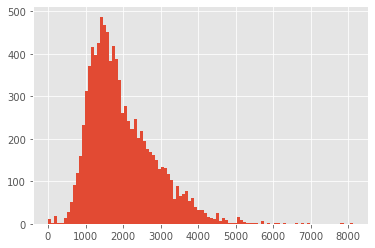

In [20]:
plt.hist(df['character_count'], bins=100);

In [21]:
min(df['character_count'])

8

In [22]:
df[df['character_count'] == 8]

,week,standing,artist,title,lyrics,character_count
7222,2001-08-25,92,Darude,Sandstorm,-techno-,8


In [23]:
df['word_count'] = 0
for idx, row in enumerate(df['lyrics']):
    df.iloc[idx, 6] = len(row.split())

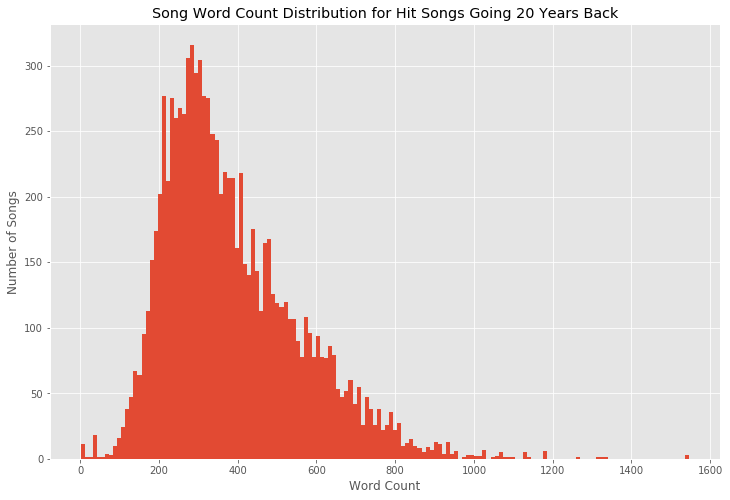

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['word_count'], bins=150)
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Songs')
ax.set_title('Song Word Count Distribution for Hit Songs Going 20 Years Back');

In [25]:
df[df['word_count'] < 10].head()

,week,standing,artist,title,lyrics,character_count,word_count
2236,2014-05-10,24,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2357,2014-02-08,50,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2489,2013-11-09,87,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
4965,2007-05-19,55,Musiq Soulchild,Buddy,[Instrumental],14,1
5098,2007-02-17,91,Musiq Soulchild,Buddy,[Instrumental],14,1


In [26]:
print('Word Count for Standing <  75: ', round(np.mean(df[df['standing'] < 75]['word_count'])), 
      '\nWord Count for Standing >= 75: ', round(np.mean(df[df['standing'] >= 75]['word_count'])))

Word Count for Standing <  75:  392 
Word Count for Standing >= 75:  370


<b>Disclaimer: Not every week of the Hot 100 was pulled.  
    Charts were pulled for every 13 weeks because of project time constraints.  
    Data does not show how long a song stayed in the top 100 or what it's max standing was.</b>

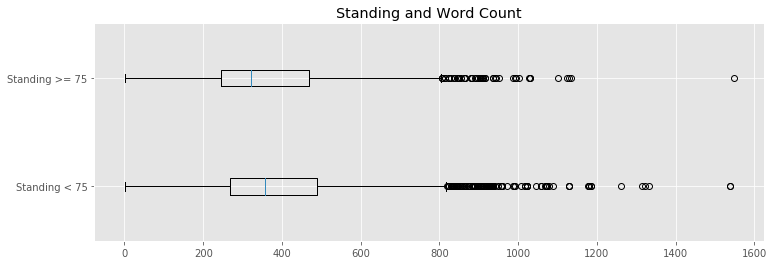

In [27]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.boxplot([df[df['standing'] < 75]['word_count'], 
            df[df['standing'] >= 75]['word_count']], vert=False)
ax.set_yticklabels(labels=['Standing < 75', 'Standing >= 75'])
ax.set_title('Standing and Word Count');

### What songs have more than 1000 words?

In [28]:
df[df['word_count'] > 1000].head(10)

,week,standing,artist,title,lyrics,character_count,word_count
14,2020-05-02,17,DaBaby Featuring YoungBoy Never Broke Again,JUMP,"(Cha-ching) Okay, let's go, nigga (Rocco did...",5384,1068
341,2019-05-04,24,21 Savage,A Lot,I love you Turn my headphone down a little bi...,5160,1059
437,2019-02-02,34,21 Savage,A Lot,I love you Turn my headphone down a little bi...,5160,1059
549,2018-11-03,55,Lil Wayne Featuring Kendrick Lamar,Mona Lisa,"I got a story to tell, you know that I cherish...",6813,1315
569,2018-11-03,78,Eminem Featuring Joyner Lucas,Lucky You,"Woah, Joyner, Joyner, yeah, yeah, yeah Yeah, ...",5872,1135
570,2018-11-03,79,Eminem,Killshot,"You sound like a bitch, bitch Shut the fuck u...",5231,1002
579,2018-11-03,90,Lil Uzi Vert,New Patek,"Hmm New Patek on my wrist White diamonds, th...",7807,1547
699,2018-05-05,18,Migos Featuring Drake,Walk It Talk It,"Quavo Yeah, yeah (Deko) Whoa, hold on (OG Park...",5423,1177
721,2018-05-05,40,Rae Sremmurd & Juicy J,Powerglide,"Yeah, yeah, yeah Mike WiLL Made-It Yeah, yea...",5345,1023
787,2018-02-03,11,"Migos, Nicki Minaj & Cardi B",MotorSport,"Yeah, whoo, yeah, skrrt M-M-M-Murda Motorspor...",5261,1006


<b> It apears that rap songs have a lot of words. Who would've thought? </b>

### Then what songs have the fewest words?

Let's look at the word count histogram again.

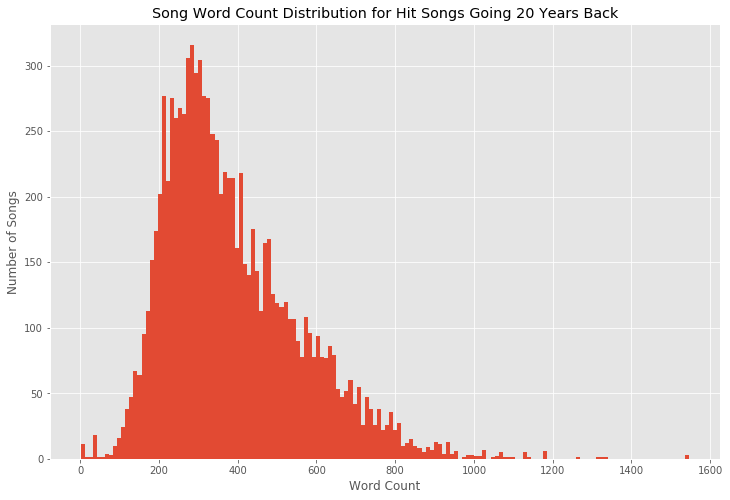

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['word_count'], bins=150)
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Songs')
ax.set_title('Song Word Count Distribution for Hit Songs Going 20 Years Back');

### Which songs have less than 100 words?

In [30]:
df[df['word_count'] < 100]

,week,standing,artist,title,lyrics,character_count,word_count
1903,2015-05-09,79,Dillon Francis & DJ Snake,Get Low,"Get low, get get get low [8x] Low [28x] Get,...",491,93
2236,2014-05-10,24,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2275,2014-05-10,65,Coldplay,Midnight,In the darkness Before the dawn In the swell...,496,95
2357,2014-02-08,50,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2489,2013-11-09,87,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2618,2013-05-11,22,Baauer,Harlem Shake,"Con los teroristas Ey Shake Ey Shake Ey, E...",202,37
3032,2012-05-12,51,Rascal Flatts,Banjo,You gotta go deep Way on back Cross a few cr...,443,88
3080,2012-05-12,100,Skrillex,Scary Monsters And Nice Sprites,I'm just like you .. you don't need....just li...,340,62
3141,2012-02-11,62,Avicii,Levels,"Oh, sometimes I get a good feeling, yeah And...",144,28
3172,2012-02-11,95,Skrillex Featuring Sirah,Kyoto,"Yo Skrill, drop it hard Yo Skrill, drop it ha...",493,96


### Some song lyrics could not be pulled

In [31]:
not_licensed_err = 'Unfortunately, we are not licensed to display the full lyrics for this song at the moment. Hopefully we will be able to in the future. Until then... how about a random page?'

In [32]:
df[df['lyrics'] == not_licensed_err]

,week,standing,artist,title,lyrics,character_count,word_count
4857,2007-08-18,41,Lifehouse,First Time,"Unfortunately, we are not licensed to display ...",173,32
5241,2006-08-19,37,T.I.,Why You Wanna,"Unfortunately, we are not licensed to display ...",173,32
5361,2006-05-20,60,T.I.,Why You Wanna,"Unfortunately, we are not licensed to display ...",173,32
5467,2006-02-18,70,P.O.D.,Goodbye For Now,"Unfortunately, we are not licensed to display ...",173,32
5724,2005-05-21,34,Ciara Featuring Missy Elliott,"1, 2 Step","Unfortunately, we are not licensed to display ...",173,32
5791,2005-02-19,2,Ciara Featuring Missy Elliott,"1, 2 Step","Unfortunately, we are not licensed to display ...",173,32
5901,2004-11-20,16,Ciara Featuring Missy Elliott,"1, 2 Step","Unfortunately, we are not licensed to display ...",173,32
6812,2002-08-24,55,Tweet,Call Me,"Unfortunately, we are not licensed to display ...",173,32
6882,2002-05-25,28,Tweet,Oops (Oh My),"Unfortunately, we are not licensed to display ...",173,32
6974,2002-02-23,25,Tweet,Oops (Oh My),"Unfortunately, we are not licensed to display ...",173,32


In [33]:
df = df.drop(df[df['lyrics'] == not_licensed_err].index, axis=0)

In [34]:
df.head(3)

,week,standing,artist,title,lyrics,character_count,word_count
0,2020-05-02,2,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ...",2371,447
1,2020-05-02,3,Roddy Ricch,The Box,Pullin' out the coupe at the lot Told 'em fuc...,2689,551
2,2020-05-02,4,Dua Lipa,Don't Start Now,"If you don't wanna see me Did a full 180, cra...",1576,304


In [35]:
df.tail(3)

,week,standing,artist,title,lyrics,character_count,word_count
9489,1995-06-03,98,Ty Herndon,What Mattered Most,I thought I knew the girl so well If she was ...,1205,248
9490,1995-06-03,99,Madonna,Bedtime Story,Today Is the last day That I'm using words ...,1418,192
9491,1995-06-03,100,Livin' Joy,Dreamer,"Love, life and laughter Is all I beleive. My...",563,108


In [36]:
df.reset_index(drop=True, inplace=True)

In [37]:
df.tail(3)

,week,standing,artist,title,lyrics,character_count,word_count
9474,1995-06-03,98,Ty Herndon,What Mattered Most,I thought I knew the girl so well If she was ...,1205,248
9475,1995-06-03,99,Madonna,Bedtime Story,Today Is the last day That I'm using words ...,1418,192
9476,1995-06-03,100,Livin' Joy,Dreamer,"Love, life and laughter Is all I beleive. My...",563,108


### Again, which songs have less than 100 words?

In [38]:
df[df['word_count'] < 100]

,week,standing,artist,title,lyrics,character_count,word_count
1903,2015-05-09,79,Dillon Francis & DJ Snake,Get Low,"Get low, get get get low [8x] Low [28x] Get,...",491,93
2236,2014-05-10,24,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2275,2014-05-10,65,Coldplay,Midnight,In the darkness Before the dawn In the swell...,496,95
2357,2014-02-08,50,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2489,2013-11-09,87,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2618,2013-05-11,22,Baauer,Harlem Shake,"Con los teroristas Ey Shake Ey Shake Ey, E...",202,37
3032,2012-05-12,51,Rascal Flatts,Banjo,You gotta go deep Way on back Cross a few cr...,443,88
3080,2012-05-12,100,Skrillex,Scary Monsters And Nice Sprites,I'm just like you .. you don't need....just li...,340,62
3141,2012-02-11,62,Avicii,Levels,"Oh, sometimes I get a good feeling, yeah And...",144,28
3172,2012-02-11,95,Skrillex Featuring Sirah,Kyoto,"Yo Skrill, drop it hard Yo Skrill, drop it ha...",493,96


<b> The genres are a little bit more mixed this time.</b>

### How about less than 50 words?

In [39]:
df[df['lyrics'] == '']

,week,standing,artist,title,lyrics,character_count,word_count


In [40]:
df[df['word_count'] < 50]

,week,standing,artist,title,lyrics,character_count,word_count
2236,2014-05-10,24,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2357,2014-02-08,50,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2489,2013-11-09,87,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2618,2013-05-11,22,Baauer,Harlem Shake,"Con los teroristas Ey Shake Ey Shake Ey, E...",202,37
3141,2012-02-11,62,Avicii,Levels,"Oh, sometimes I get a good feeling, yeah And...",144,28
4964,2007-05-19,55,Musiq Soulchild,Buddy,[Instrumental],14,1
5097,2007-02-17,91,Musiq Soulchild,Buddy,[Instrumental],14,1
5524,2005-11-19,33,Ashlee Simpson,Boyfriend,[Lyrics Removed],16,2
7212,2001-08-25,92,Darude,Sandstorm,-techno-,8,1
7406,2001-02-24,94,Iconz Featuring Tony Manshino,Get Crunked Up,Comittee 2000 baby get crunked up(Get Crunked ...,195,33


<b> We've got some lyric values of "[Instrumental]", "[Lyrics Removed]", "-techno-", "Instrumental", and some that were removed because of copyright.  

Let's drop the "[Lyrics Removed]" and the ones with copyright issues.</b>

In [41]:
df[df['lyrics'] == '[Lyrics Removed]']

,week,standing,artist,title,lyrics,character_count,word_count
5524,2005-11-19,33,Ashlee Simpson,Boyfriend,[Lyrics Removed],16,2


In [42]:
copyright_issue_text = 'Due to copyright restrictions, we are not authorized to display these lyrics.'
df[df['lyrics'] == copyright_issue_text]

,week,standing,artist,title,lyrics,character_count,word_count
8941,1996-11-30,69,Angelina,I Don't Need Your Love,"Due to copyright restrictions, we are not auth...",77,12


In [43]:
df = df.drop(df[df['lyrics'] == '[Lyrics Removed]'].index, axis=0)

In [44]:
df = df.drop(df[df['lyrics'] == copyright_issue_text].index, axis=0)

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
df.tail(3)

,week,standing,artist,title,lyrics,character_count,word_count
9472,1995-06-03,98,Ty Herndon,What Mattered Most,I thought I knew the girl so well If she was ...,1205,248
9473,1995-06-03,99,Madonna,Bedtime Story,Today Is the last day That I'm using words ...,1418,192
9474,1995-06-03,100,Livin' Joy,Dreamer,"Love, life and laughter Is all I beleive. My...",563,108


<b>Techno, Instrumental, and any other songs that are free of lyrics might be usefull to keep track of. How should we take not of them? </b>

In [47]:
lyrics_idx = df.columns.get_loc('lyrics')

In [48]:
df[df['lyrics'] == 'Instrumental']

,week,standing,artist,title,lyrics,character_count,word_count
8775,1997-05-31,81,Kenny G,Havana,Instrumental,12,1
8936,1996-11-30,64,Kenny G,The Moment,Instrumental,12,1
8995,1996-08-31,32,Robert Miles,Children,Instrumental,12,1
9085,1996-06-01,33,Robert Miles,Children,Instrumental,12,1


In [49]:
# replace descriptions with '-1'
lyrics_idx = df.columns.get_loc('lyrics')
no_lyric_desc = ['Instrumental', '-techno-', '[Instrumental]']
df['lyrics'].replace(no_lyric_desc, '-1', inplace=True)

In [56]:
df[df['word_count'] < 10]

,week,standing,artist,title,lyrics,character_count,word_count
2236,2014-05-10,24,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2357,2014-02-08,50,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
2489,2013-11-09,87,Martin Garrix,Animals,We're the fuckin animals We're the fuckin ani...,50,8
4964,2007-05-19,55,Musiq Soulchild,Buddy,-1,14,1
5097,2007-02-17,91,Musiq Soulchild,Buddy,-1,14,1
7211,2001-08-25,92,Darude,Sandstorm,-1,8,1
8775,1997-05-31,81,Kenny G,Havana,-1,12,1
8936,1996-11-30,64,Kenny G,The Moment,-1,12,1
8995,1996-08-31,32,Robert Miles,Children,-1,12,1
9085,1996-06-01,33,Robert Miles,Children,-1,12,1


### We still have some duplicate songs. Let's remove those and drop the week and standing columns. 

But first, export to json to save progress.

In [69]:
# df.to_json('lyrics_with_standings.json')

In [70]:
df = df.drop(['week', 'standing'], axis=1)

In [71]:
df.head()

,artist,title,lyrics,character_count,word_count
0,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ...",2371,447
1,Roddy Ricch,The Box,Pullin' out the coupe at the lot Told 'em fuc...,2689,551
2,Dua Lipa,Don't Start Now,"If you don't wanna see me Did a full 180, cra...",1576,304
3,Doja Cat,Say So,"Day and night til morning, keeping me in the m...",2203,446
4,Post Malone,Circles,"Hey, hey, hey, hey Oh, oh, oh-oh Oh, oh, oh-...",1570,318


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9475 entries, 0 to 9474
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist           9475 non-null   object
 1   title            9475 non-null   object
 2   lyrics           9475 non-null   object
 3   character_count  9475 non-null   int64 
 4   word_count       9475 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 370.2+ KB


In [73]:
df = df.drop_duplicates()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6252 entries, 0 to 9474
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist           6252 non-null   object
 1   title            6252 non-null   object
 2   lyrics           6252 non-null   object
 3   character_count  6252 non-null   int64 
 4   word_count       6252 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 293.1+ KB


### Dropping duplicates reduced the dataset from 9475 songs to 6252 songs!

In [75]:
df.head()

,artist,title,lyrics,character_count,word_count
0,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ...",2371,447
1,Roddy Ricch,The Box,Pullin' out the coupe at the lot Told 'em fuc...,2689,551
2,Dua Lipa,Don't Start Now,"If you don't wanna see me Did a full 180, cra...",1576,304
3,Doja Cat,Say So,"Day and night til morning, keeping me in the m...",2203,446
4,Post Malone,Circles,"Hey, hey, hey, hey Oh, oh, oh-oh Oh, oh, oh-...",1570,318


### Love and Hate

In [76]:
love_list = []
for row in df['lyrics']:
    love_list.append('love' in row)

df[love_list].head()

,artist,title,lyrics,character_count,word_count
0,Drake,Toosie Slide,"Black leather gloves, no sequins (Yeah, yeah, ...",2371,447
3,Doja Cat,Say So,"Day and night til morning, keeping me in the m...",2203,446
4,Post Malone,Circles,"Hey, hey, hey, hey Oh, oh, oh-oh Oh, oh, oh-...",1570,318
6,DaBaby Featuring Roddy Ricch,ROCKSTAR,"Woo, woo I pull up like How you pull up, Bab...",3244,656
10,Maren Morris,The Bones,We're in the homestretch of the high times We...,1695,319


In [77]:
hate_list = []
for row in df['lyrics']:
    hate_list.append('hate' in row)
    
df[hate_list].head()

,artist,title,lyrics,character_count,word_count
9,Camila Cabello Featuring DaBaby,My Oh My,"Ha, ha, ha, ha They say he likes a good time ...",2148,453
13,Gabby Barrett,I Hope,"I, I hope she makes you smile The way it made...",2211,471
20,blackbear,Hot Girl Bummer,"Fuck you and you, and you I hate your friends...",2623,513
29,Surfaces,Sunday Best,"Feeling good, like I should Went and took a w...",1271,223
30,Dua Lipa,Break My Heart,I've always been the one to say the first good...,2435,495


In [80]:
# print('\nSongs with love: ', sum(love_list), 'Average Standing: ', round(np.mean(df[love_list]['standing'])), 
#       '\nSongs with hate: ', sum(hate_list), 'Average Standing: ', round(np.mean(df[hate_list]['standing'])))

In [79]:
print('\nSongs with love: ', sum(love_list), 
      '\nSongs with hate: ', sum(hate_list))


Songs with love:  3353 
Songs with hate:  791


<b> There appears to be a lot of songs in Hot 100 that mention the word love and not as many that mention the word hate.</b>

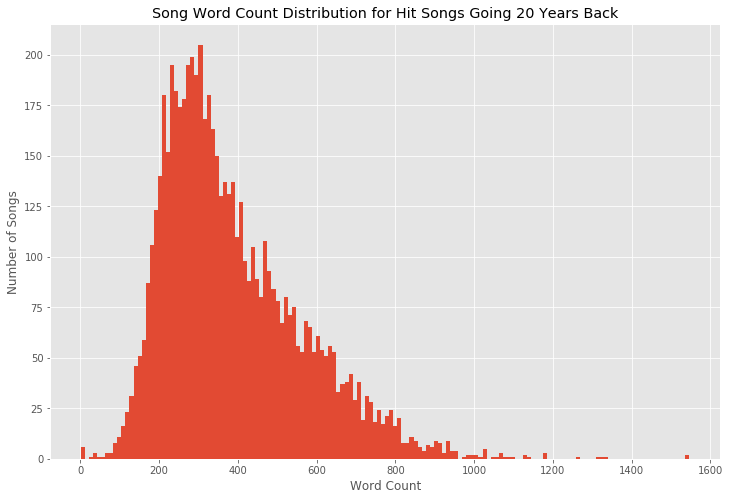

In [81]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['word_count'], bins=150)
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Songs')
ax.set_title('Song Word Count Distribution for Hit Songs Going 20 Years Back');

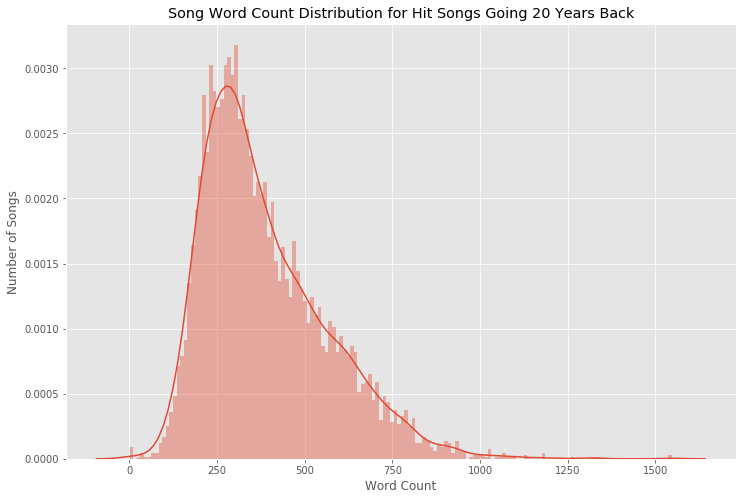

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df['word_count'], bins=150)
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Songs')
ax.set_title('Song Word Count Distribution for Hit Songs Going 20 Years Back');

Not very informative but here is the character count plotted against the word count

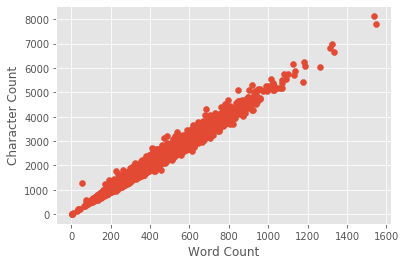

In [92]:
plt.scatter(df['word_count'], df['character_count'])
plt.xlabel('Word Count')
plt.ylabel('Character Count');


Who're those outiers?

In [93]:
df[(df['word_count'] < 100) & (df['character_count'] > 1000)]

,artist,title,lyrics,character_count,word_count
3452,Duck Sauce,Barbra Streisand,Barbra Streisand Woowoowoowoowoowoowoowoowoow...,1272,52


Nope, it's not an artist using really long words. It's Duck Sauce and and a miss interpretation of their vocalizations. 

In [127]:
df.loc[(df['title'] == 'Barbra Streisand'), 'lyrics'].values

array(['Barbra Streisand  Woowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoow  Oowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowo   Owoowoowoowoowoo  Barbra Streisand    Woowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoow  Oowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowo  Owoowoowoowoowoo    Barbra Streisand    Woowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoow  Oowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowo  Owoowoowoowoowoo    Barbra Streisand    Woowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoow  Oowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowo  Owoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoo  Woowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoow  Oowoowoowoowoowoowoowoowoowoowoowoowoo    Barbra Streisand    Woowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoow  Oowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowoowo  Owoowoowoowoowoo    Barbra Streisand    Wowowo wowowo wowowowoowoo  Woowoowoowoowoowoowoowoowoowoowoo wowowo 

In [94]:
df[(df['word_count'] > 1300)]

,artist,title,lyrics,character_count,word_count
549,Lil Wayne Featuring Kendrick Lamar,Mona Lisa,"I got a story to tell, you know that I cherish...",6813,1315
579,Lil Uzi Vert,New Patek,"Hmm New Patek on my wrist White diamonds, th...",7807,1547
1113,Kendrick Lamar,Fear.,(I don't think I can find a way to make it on ...,6977,1323
2360,Eminem,Rap God,"Look, I was gonna go easy on you not to hurt y...",8122,1539
7464,Eminem Featuring Dido,Stan,My tea's gone cold I'm wondering why I got ou...,6642,1333


In [126]:
df.loc[(df['title'] == 'Rap God'), 'lyrics'].values

array(['Look, I was gonna go easy on you not to hurt your feelings  But I\'m only going to get this one chance  Something\'s wrong, I can feel it   Six minutes. Six Minutes. Six minutes, Slim Shady, you\'re on!  Just a feeling I\'ve got  Like something\'s about to happen, but I don\'t know what  If that means what I think it means  We\'re in trouble, big trouble  And if he is as bananas as you say, I\'m not taking any chances  You are just what the doc ordered    I\'m beginnin\' to feel like a Rap God, Rap God  All my people from the front to the back nod, back nod  Now who thinks their arms are long enough to slap box, slap box?  They said I rap like a robot, so call me rap-bot  But for me to rap like a computer must be in my genes  I got a laptop in my back pocket  My pen\'ll go off when I half-cock it  Got a fat knot from that rap profit  Made a livin\' and a killin\' off it  Ever since Bill Clinton was still in office  With Monica Lewinsky feelin\' on his, nutsack  I\'m an MC still

### Time to move to a new notebook and building a model!

In [128]:
# df.to_json('lyrics_cleaned.json')